## Introduction:
    The incident of sinking of Titanic was an devastating experience for the whole world. Many lives lost that dreadfull night including children and women. After the incident, from all corners of world as sympathies were pouring in, many scholars started to find the cause behind the sad incident but the important thing to remember is no matter how much precautions you take, calamity can come in any form. So instead of focusing on the root causes of problem, it is better to analyse the previous occurences of the simialar devastating incidents and try to reduce the damage which might occur to human life.
    
    In this case study, we are going to try and find out the answers to some questions such as, Was there any relation between the 'economic status of the passengers' and the 'survival chances'? Was there any relation between the 'Age' or 'Gender' of the passenger and the 'survival chances' ? After elaborating on questions such as above, we will try to build a machine learning model which will learn from the features of passengers onboard and based on the features , the model will predict the 'survival chance' of a particular passenger.

## Dataset Features:

#### Below are the features of the passengers who were onboard on the titanic, these features represent certain information about each passenger and it's socio-economic status.

1) Age ==>>
    
    Age in years
    Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

2) Sibsp ==>> 
    
    NO of siblings / spouses aboard the Titanic
    
    The dataset defines family relations in this way...

        a. Sibling = brother, sister, stepbrother, stepsister

        b. Spouse = husband, wife (mistresses and fiancés were ignored)

3) Parch ==>> 
    
    The dataset defines family relations in this way...

        a. Parent = mother, father

        b. Child = daughter, son, stepdaughter, stepson

        c. Some children travelled only with a nanny, therefore parch=0 for them.

4) Pclass ==>> A proxy for socio-economic status (SES)

        1st = Upper
        2nd = Middle
        3rd = Lower

5) Embarked ==>> 

    Port of Embarkation
        C = Cherbourg,
        Q = Queenstown, 
        S = Southampton

6) Name ==>> 

    Passenger Name

7) Sex ==>>
    
    Sex (Gender) of the passenger
    
8) Ticket ==>> 

    Ticket number of the passenger
    
9) Cabin ==>> 

    Cabin number allocated to the passenger
    
10) Fare ==>> 

    Indicating the fare paid by the passenger
    
11) PassengerID ==>> 
    
    Passenger ID

12) Survival ==>> 

    Passenger survived or not ---> 0 = No, 1 = Yes

## Importing the Libraries

In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

## Loading of the data

In [2]:
df=pd.read_csv('titanic.csv')

## Descriptive Analysis of the dataset

In [3]:
df.shape

(891, 12)

Our dataset has $891$ **rows of passenger records** which are divided among $12$ **columns** such that each column represents a particular feature of the passenger.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Of all the available features, only **Age, Cabin, and Embarked** features have less non-null data as compared to other features which means that these three features have missing data for some passengers. In our dataset, $2$ features are having *float64* type data, while the number of features with *int64* and *object* datatype is $5$ each.

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We see that, the Mean value > Median only for *Fare* feature, that means the data distribution for *Fare* is right skewed. We also observe that the the **standard deviation** values for **PassengerID, Age and Fare** features are very large meaning the much of the data for these features is spread away from the mean.

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

There is a **combination of varible categories** present in the data : 

    Categorical features : Survived,Sex, Embarked
    Ordinal features: Pclass
    Continuous features: Age, Fare
    Discrete features: SibSp, Parch

The **target variable in our dataset in 'Survived'** and rest 11 features are independent features.

In [7]:
#check duplicate rows
dup_df=df[df.duplicated()]
dup_df.shape

(0, 12)

There are **no duplicate** records of passengers present in the dataframe.

## Univariate Analysis of features

We will store columns of dataframe into a temporary python list so that we can fetch each column one by one.

In [8]:
list_cols=df.columns

In [9]:
list_cols[0]

'PassengerId'

#### 1.'PassengerId' 

In [10]:
df['PassengerId'].dtypes

dtype('int64')

In [11]:
df['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

**PassengerID** feature has no impact on target variable which is 'Survived', so it will be excluded from analysis.

In [12]:
list_cols[1]

'Survived'

#### 2.'Survived'

This is our **target variable.** The values in this column represent $0$ means *'Not Survived'* and $1$ means *Survived*.

In [13]:
df['Survived'].dtype

dtype('int64')

In [14]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

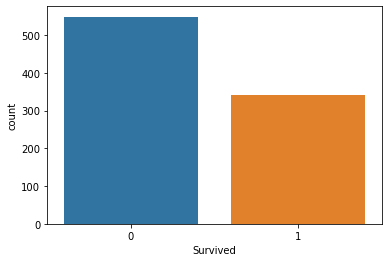

In [15]:
sn.countplot(df['Survived'])
plt.show()

**62%** of the people died because of the sinking of the Titanic and **38%** of them survived. This huge amount of death percentage makes 'Titanic' one of the worst events in history and we see from the data distribution of target variable that the dataset is not imbalanced.

In [16]:
list_cols[2]

'Pclass'

#### 3.'Pclass'

In [17]:
df['Pclass'].dtype

dtype('int64')

In [18]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

It is a **categorical** variable with $3$ types of values:

    Class 1,
    Class 2,
    Class 3.

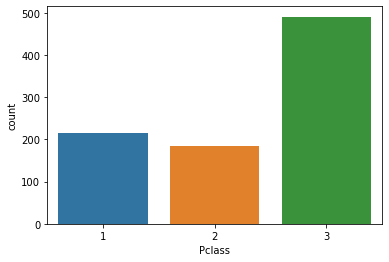

In [19]:
sn.countplot(df['Pclass'])
plt.show()

Majority of people were travelling in 3rd Class of the ship, followed by 1st class.

In [20]:
list_cols[3]

'Name'

#### 4.'Name'

In [21]:
df['Name'].dtype

dtype('O')

In [22]:
df['Name'].value_counts()

Abbing, Mr. Anthony                1
Peuchen, Major. Arthur Godfrey     1
Adahl, Mr. Mauritz Nils Martin     1
Jansson, Mr. Carl Olof             1
Heikkinen, Miss. Laina             1
                                  ..
Beckwith, Mr. Richard Leonard      1
Fischer, Mr. Eberhard Thelander    1
Moraweck, Dr. Ernest               1
Crosby, Capt. Edward Gifford       1
Greenfield, Mr. William Bertram    1
Name: Name, Length: 891, dtype: int64

The **Name** feature values are as such of no use for prediction of survival chances but we extract information from the same to generate any insights, if any.

In [23]:
temp_names=[]
temp_titles=[]
for i in df['Name']:
    temp_names.append(i.split(',')[1])
for i in temp_names:
    temp_titles.append(i.split('.')[0])

In [24]:
df['Title of passenger']=temp_titles

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title of passenger
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


We have extracted the **title** given to a passenger as per the travel records. We will plot the titles of passengers.

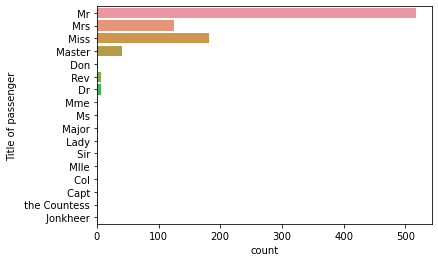

In [26]:
sn.countplot(y=df['Title of passenger'])
plt.show()

From above plot for **Title of passenger**, we see that the large number of passengers with **Mr.** title is in synchronous with the large male passengers seen from the plot for **Sex** feature.

In [27]:
list_cols[4]

'Sex'

#### 5.'Sex'

**Sex** is a categorical feature with $2$ categories: 
    
    1. Male
    2. Female

In [28]:
df['Sex'].dtype

dtype('O')

In [29]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

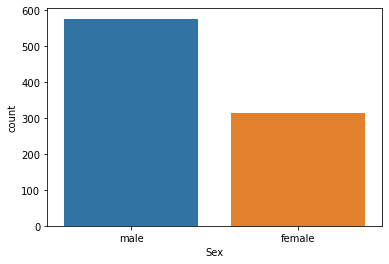

In [30]:
sn.countplot(df['Sex'])
plt.show()

Titanic had more males than females as travellers which can be seen from above plot of **Sex** feature.

In [31]:
list_cols[5]

'Age'

#### 6.'Age'

Age is a numerical feature.

In [32]:
df['Age'].dtype

dtype('float64')

In [33]:
print('The age of travellers ranges between ',df['Age'].min()," and ",df['Age'].max())

The age of travellers ranges between  0.42  and  80.0


In [34]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

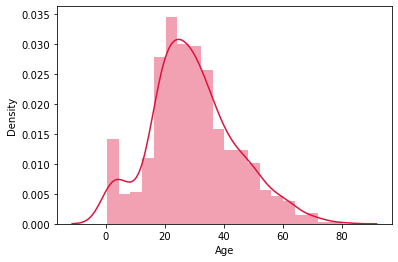

In [35]:
sn.distplot(df['Age'],color='crimson')
plt.show()

The **mean age of the passengers** as per the travel records was around $29$,the standard deviation of the distribution of data of **Age** feature is $14$ which is indication that the much data is spread away from the mean.

In [36]:
list_cols[6]

'SibSp'

#### 7.'SibSp'

**SibSp** feature gives us the information of number of siblings or spouses that travelled with a person.

In [37]:
df['SibSp'].dtype

dtype('int64')

In [38]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Many of the passengers did not have any sibling or spouse,i.e. **most of the people were travelling alone.**

In [39]:
list_cols[7]

'Parch'

#### 8.'Parch'

In [40]:
df['Parch'].dtype

dtype('int64')

In [41]:
df['Parch'].isnull().sum()

0

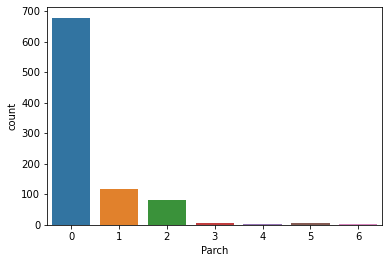

In [42]:
sn.countplot(df['Parch'])
plt.show()

Many passengers were **travelling alone** as seen from the above info of parents and children.

In [43]:
list_cols[8]

'Ticket'

#### 9.'Ticket'

Ticket number is an identification number allocated to each person with his ticket. **Ticket** feature is a **mix of numeric and alphanumeric** data.

In [44]:
df['Ticket'].dtype

dtype('O')

In [45]:
df['Ticket'].value_counts()

CA. 2343      7
1601          7
347082        7
347088        6
CA 2144       6
             ..
250646        1
3101264       1
4135          1
11753         1
C.A. 29395    1
Name: Ticket, Length: 681, dtype: int64

We see some ticket numbers are allocated to more than one passenger which are the cases of family or group travelling together and has registered for the journey through one person.

In [46]:
list_cols[9]

'Fare'

#### 10. 'Fare'

**Fare** is a numerical feature, the feature gives us the amount paid by the passenger.

In [47]:
df['Fare'].dtype

dtype('float64')

In [48]:
print("The travle fare ranges between ",df['Fare'].min()," and ",df['Fare'].max())

The travle fare ranges between  0.0  and  512.3292


In [49]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

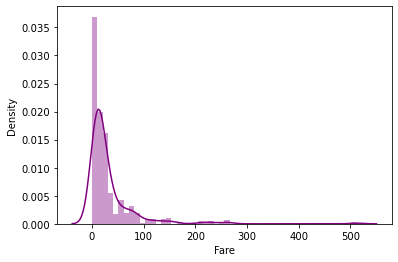

In [50]:
sn.distplot(df['Fare'],color='purple')
plt.show()

As per the travel records, the **mean** fare for the journey was around $32$ GBP. From above distribution plot for **Fare** feature, we see that the data is **right skewed** which might be **due to uneven fare** amounts which are understood as outlying values in the plot.

In [51]:
list_cols[10]

'Cabin'

#### 11.'Cabin'

**Cabin** numbers which are allocated to each booked ticket is stored in this feature. The data is **alphanumeric**.

In [52]:
df['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
E101           3
              ..
D30            1
B73            1
C128           1
C85            1
B3             1
Name: Cabin, Length: 147, dtype: int64

As we can see from above frequency data, some cabin numbers are repeated in the dataset as same cabin can be occupied by multiple people.

In [53]:
list_cols[11]

'Embarked'

#### 12.'Embarked'

**Embarked** is a categorical variables with 3 ports which are boarding point for passengers: 

    1. C (Cherbourg),
    2. Q (Queenstown) 
    3. S (Southampton)

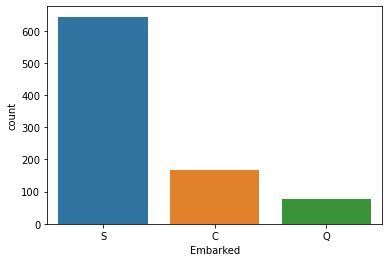

In [54]:
sn.countplot(df['Embarked'])
plt.show()

Majority of the passengers embarked from port at S (Southampton), followed by Cherbourg.

## Multivariate analysis

#### Age , Sex and Survival Rate

In [55]:
df_females=df[df['Sex']=='female']
df_males=df[df['Sex']=='male']

In [56]:
survived_f=df_females[df_females['Survived']==1]
not_survived_f=df_females[df_females['Survived']==0]

In [57]:
survived_m=df_males[df_males['Survived']==1]
not_survived_m=df_males[df_males['Survived']==0]

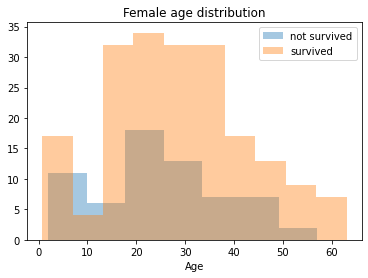

In [58]:
fig=plt.figure()
ax1=fig.add_subplot(111)
sn.distplot(df_females[df_females['Survived']==0].Age.dropna(),label = "not survived",kde=False,ax=ax1)
sn.distplot(df_females[df_females['Survived']==1].Age.dropna(),label = "survived",kde=False,ax=ax1)
plt.title("Female age distribution")
plt.legend()
plt.show()

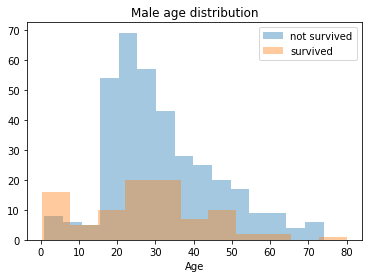

In [59]:
fig=plt.figure()
ax=fig.add_subplot(111)
sn.distplot(df_males[df_males['Survived']==0].Age.dropna(),label = "not survived",kde=False,ax=ax)
sn.distplot(df_males[df_males['Survived']==1].Age.dropna(),label = "survived",kde=False,ax=ax)
plt.title("Male age distribution")
plt.legend()
plt.show()

From above two plots we see that **Men** didnot have high survival rate as compare to **Women**

#### 'Pclass' , 'Sex' & 'Survived'

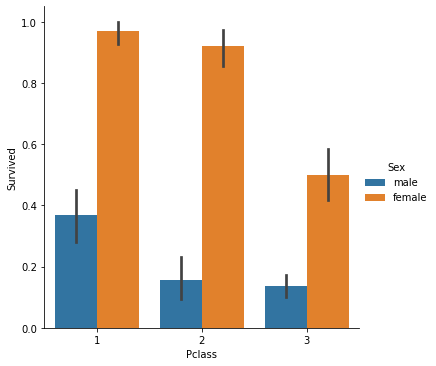

In [60]:
sn.catplot(x='Pclass',y='Survived',data=df,kind='bar',hue='Sex')
plt.show()

The majority of survivers in any of the three classes are females. The proportion of survived people decreases as the Passenger Class level decreases.

#### 'Age', 'Sex' & 'Survived'

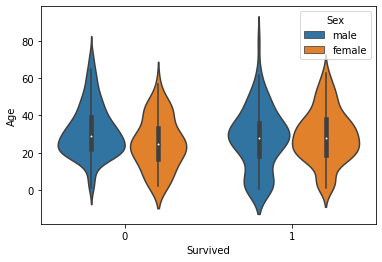

In [61]:
sn.violinplot(df['Survived'],df['Age'],hue=df['Sex'])
plt.show()

Most of the male and female survivers were between age group 20 to 35.

#### 'Age', 'Fare' & 'Survived'

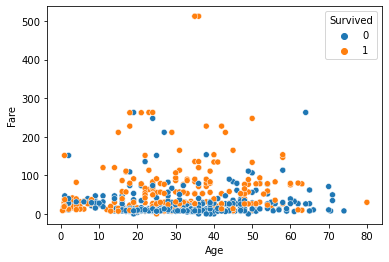

In [62]:
sn.scatterplot(x=df['Age'],y=df['Fare'],hue=df['Survived'])
plt.show()

The travellers with high fare had high chances of survival. 

#### 'Age', 'Pclass' and 'Survived'

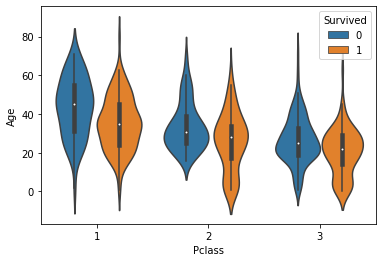

In [63]:
sn.violinplot(x=df['Pclass'],y=df['Age'],hue=df['Survived'])
plt.show()

The travellers in 1st class were mostly senior adults and they were most of the survivers.

#### 'Cabin','Age' and 'Survived'

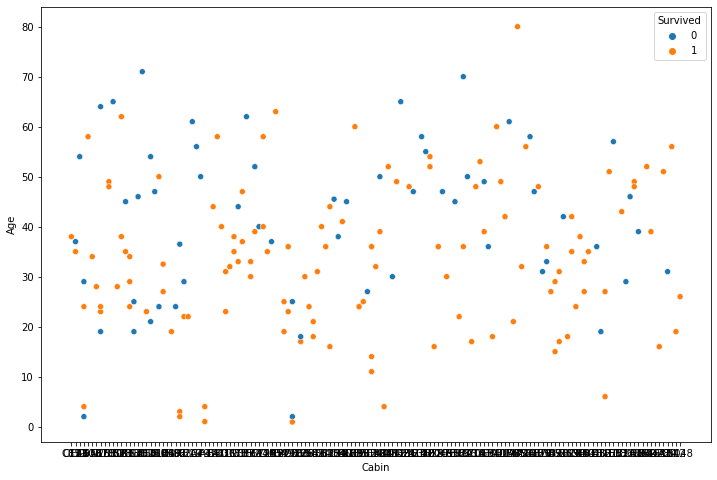

In [64]:
plt.figure(figsize=(12,8))
sn.scatterplot(x=df['Cabin'],y=df['Age'],hue=df['Survived'])
plt.show()

There was no relation seen between class allocated onboard and age of people.

# Data Pre-Processing

#### Extracting features from 'Name'

We have already extracted the **title of a person** feature from **Name** feature.

In [65]:
df['Title of passenger'].head()

0       Mr
1      Mrs
2     Miss
3      Mrs
4       Mr
Name: Title of passenger, dtype: object

In [66]:
pd.crosstab(columns=df['Survived'],index=df['Title of passenger'])

Survived,0,1
Title of passenger,,
Capt,1,0
Col,1,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23
Miss,55,127


The %ge of survival was very less with 'Master' titles as well as 'Mr'.

#### Handling of missing values

In [67]:
round(df.isnull().sum()/df.shape[0]*100,2).astype(str)+'%'

PassengerId             0.0%
Survived                0.0%
Pclass                  0.0%
Name                    0.0%
Sex                     0.0%
Age                   19.87%
SibSp                   0.0%
Parch                   0.0%
Ticket                  0.0%
Fare                    0.0%
Cabin                  77.1%
Embarked               0.22%
Title of passenger      0.0%
dtype: object

77% of the values of 'Cabin' are null, so we can drop this column.

In [68]:
df.drop('Cabin',axis=1,inplace=True)

In [69]:
df.shape

(891, 12)

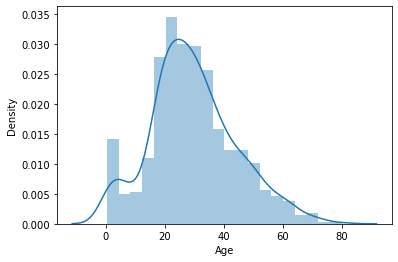

In [70]:
sn.distplot(df['Age'])
plt.show()

In [71]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The mean of 'Age' column is higher than median, so the data is right skewed. We will replace the missing values with median of that column.

In [72]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [73]:
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

After replacing the null values with median of 'Age' column, the mean and median is undisturbed.

As we have extracted necessary feature from 'Name', we will drop it

In [74]:
df.drop('Name',axis=1,inplace=True)

In [75]:
df.shape

(891, 11)

In [76]:
df['Embarked'].isnull().sum()

2

In [77]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

As the most frequent Embarked station is Southampton, we will replace the 2 missing values with 'S'

In [78]:
df['Embarked'].fillna('S',inplace=True)

In [79]:
df['Embarked'].isnull().sum()

0

#### Checking for outliers

In [80]:
numerical_cols=[]
numerical_cols.clear()
for column in df:
    if df[column].dtypes!='object':
        numerical_cols.append(column)

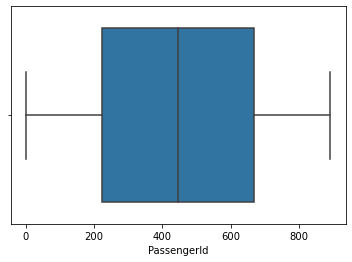

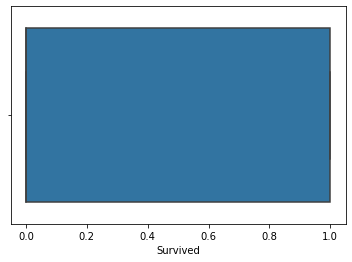

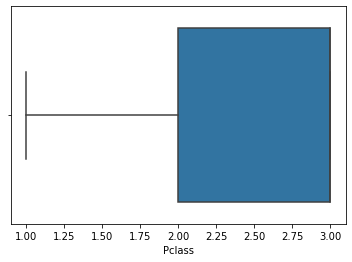

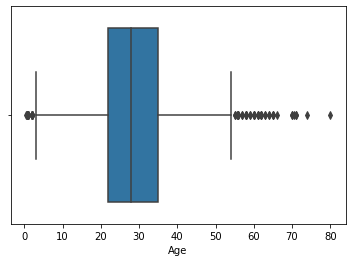

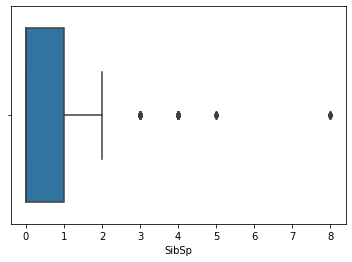

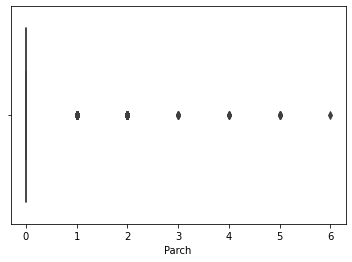

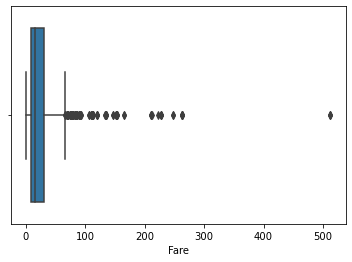

In [81]:
for column in numerical_cols:
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax=sn.boxplot(df[column])
    ax.set_xlabel(column)
    plt.show()

Outlying data points of **SibSp(Siblings&Spouses) , Age(Age of Traveller), Parch(Parents&Children)** features are justifiable as these values can vary according to different persons. We will treat outlying data values for **Fare** feature.

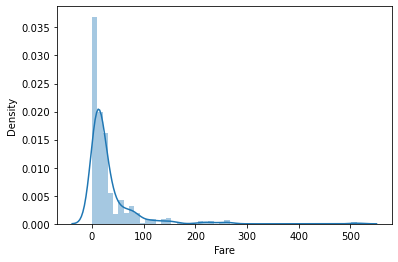

In [82]:
sn.distplot(df['Fare'])
plt.show()

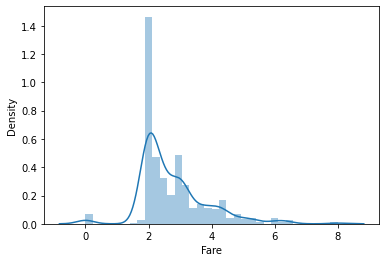

In [83]:
sn.distplot(np.cbrt(df['Fare']))
plt.show()

To reduce the skewness of data distribution and control the effect of outlier, we will use cuberoot transform on **Fare** feature.

In [84]:
df['Fare']=np.cbrt(df['Fare'])

### Label Encoding

In [85]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [86]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col]=le.fit_transform(df[col])

In [87]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title of passenger
0,1,0,3,1,22.0,1,0,523,1.935438,2,11
1,2,1,1,0,38.0,1,0,596,4.146318,0,12
2,3,1,3,0,26.0,0,0,669,1.993730,2,8
3,4,1,1,0,35.0,1,0,49,3.758647,2,12
4,5,0,3,1,35.0,0,0,472,2.004158,2,11


#### Splitting the dataset into independent features and target features

In [88]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [89]:
print(x.shape)
print(y.shape)

(891, 10)
(891,)


### Scaling

In [90]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()

In [91]:
for col in x.columns:
    x[col]=s.fit_transform(x[col].values.reshape(-1,1))

#### Finding the best random state

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ",maxAccu," at random state ",maxRs)

Best Accuracy is  0.847457627118644  at random state  150


# Model Building

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=150)

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

In [95]:
lr=LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()
er = ExtraTreesClassifier()

In [96]:
#Cross validation
model_names = []
model_names.append(('Losgistic Regression', lr))
model_names.append(('Decision Tree', dt))
model_names.append(('Random Forest', rf))
model_names.append(('KNN', knn))
model_names.append(('Gaussian', gnb))
model_names.append(('ExtraTreesClassifier', er))

In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results = []
names = []
scoring = 'accuracy'
seed=7
for name, model in model_names:
    kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    res = "%s: %f " % (name, cv_results.mean())
    print(res)

Losgistic Regression: 0.793496 
Decision Tree: 0.769850 
Random Forest: 0.832772 
KNN: 0.805843 
Gaussian: 0.773271 
ExtraTreesClassifier: 0.813683 


#### As mean scores of cross-validation for Random Forest is high, we will use Random Forest Classifier.

### About Random Forest Classifier:
    
    Random Forest classifier is a supervised learning algorithm. It creates a forest of decision trees and it is trained with Bagging method. In Bagging methodology, dataset is divided into small chunks of data and for each subset a DecisionTreeClassifier model will be trained and the final accuracy will be calculated by averaging them.
    
    In layman's terms, Random Forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

## Hyper Parameter Tuning

In [98]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy']}

model=rf

grid=GridSearchCV(estimator=model,param_grid=parameters)

grid.fit(x,y)

print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

0.8294206264515724
gini
{'criterion': 'gini'}


In [99]:
fin_model=RandomForestClassifier(criterion='gini')

In [100]:
fin_model.fit(x_train,y_train)
fin_predict=fin_model.predict(x_test)

#### ROC AUC Score

In [101]:
from sklearn.metrics import roc_curve,roc_auc_score

In [102]:
y_test_prob = fin_model.predict_proba(x_test)[:,1]

print('AUC:',roc_auc_score(y_test,y_test_prob))

AUC: 0.9131732238349884


#### ROC AUC Curve

In [103]:
fpr,tpr,thresholds = roc_curve(y_test,y_test_prob) #thresholds here are the cutoffs

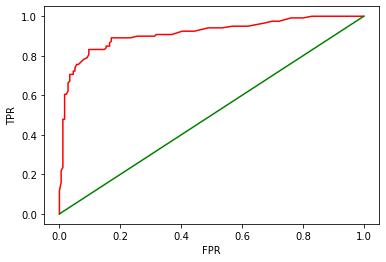

In [104]:
plt.plot(fpr,tpr,'r')
plt.plot(fpr,fpr,'g')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Our Random Forest model predicts with accuracy of 83%. From the ROC AUC curve, we see that our classifier (red) is farther away from the purely random classifier so our model seems to do a good job. Also, the ROC AUC score of 0.90 is good enough.

## Conclusion:
    After exploring the dataset, we found out the relation between various independent features of a traveller on Titanic and the traveller's survival chances. For this data exploration we took help of Seaborn and Matplotlib libraries. During Data Pre-processing step, we extracted 'Title of person' feature from 'Name' feature and later dropped the 'Name' column from dataset.Then we computed missing value percentage and filled the places with appropriate values.After checking for outliers and handling the outliers we split our dataset into training and testing subset with the help of 'train_test_split'. By comparing cross-validation scores of various algorithms on our dataset, we decided to use Random Forest Classifier.